# IS 733 Homework 3

# Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/faithful.csv')

# Check the first few rows to understand the structure
print(data.head())

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


# Problem 1

# (a) Scatter plot of the dataset (eruption time vs. waiting time)

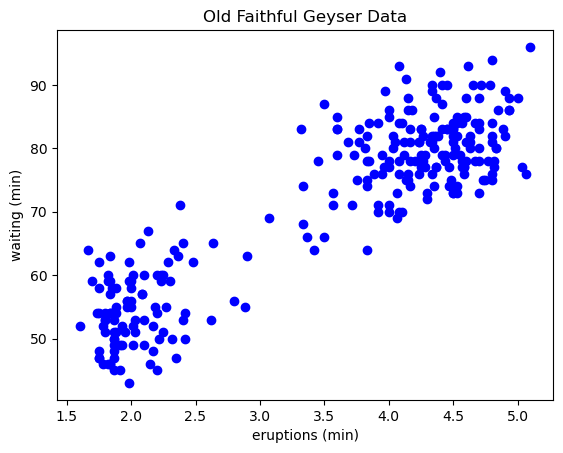

In [3]:
# Assuming the dataset has columns 'eruption_time' and 'waiting_time'
plt.scatter(data['eruptions'], data['waiting'], color='blue')
plt.xlabel('eruptions (min)')
plt.ylabel('waiting (min)')
plt.title('Old Faithful Geyser Data')
plt.show()

# Problem 2

# (a) K-means algorithm

In [6]:
def initialize_centroids(data, k):
    """Randomly initialize centroids from data points."""
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Update the centroid of each cluster."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    """K-means clustering algorithm from scratch."""
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    objective_values = []
    
    for _ in range(max_iters):
        # Step 1: Assign clusters
        labels = assign_clusters(data, centroids)
        
        # Step 2: Update centroids
        new_centroids = update_centroids(data, labels, k)
        
        # Step 3: Calculate objective function
        objective = np.sum((data - new_centroids[labels]) ** 2)
        objective_values.append(objective)
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return labels, centroids, objective_values

# Prepare data for clustering (ignoring the first column if it's an ID column)
X = data[['eruptions', 'waiting']].to_numpy()

# Choose the number of clusters based on your observation in Problem 1
k = 2  # or the number you identified visually
labels, centroids, objective_values = kmeans(X, k)

# (b) Scatter plot of final clustering

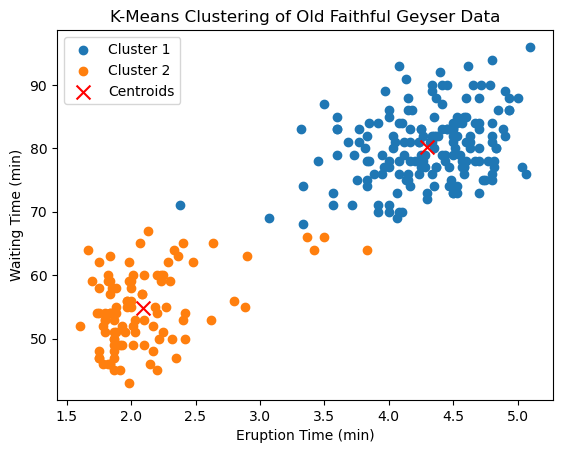

In [7]:
# Plot the clustered data points
for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.xlabel('Eruption Time (min)')
plt.ylabel('Waiting Time (min)')
plt.title('K-Means Clustering of Old Faithful Geyser Data')
plt.legend()
plt.show()

# (c) A plot of the k-means objective function value vs. iterations

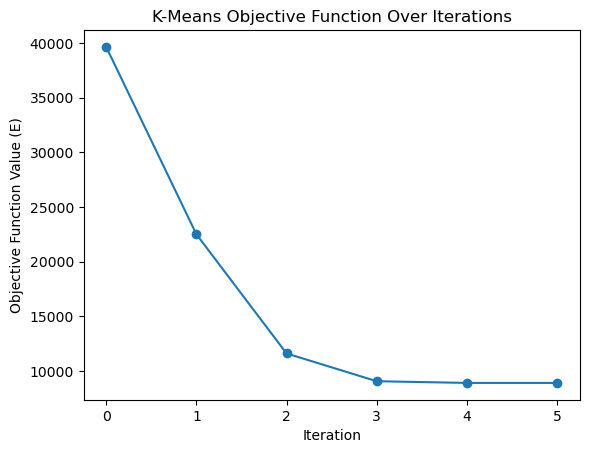

In [8]:
# Plot objective function over iterations
plt.plot(objective_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (E)')
plt.title('K-Means Objective Function Over Iterations')
plt.show()